In [1]:
"""
Shock and Detonation Toolbox Program

Calculates the CJ speed with various initial conditions 
using the Minimum Wave Speed Method and 
then finds the equilibrium state of the gas behind a shock wave 
traveling at the CJ speed.

"""
import cantera as ct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sdtoolbox.postshock import CJspeed
from sdtoolbox.postshock import PostShock_eq
from sdtoolbox.thermo import soundspeed_eq, soundspeed_fr

In [2]:
#Setting plotting defaults
plt.style.use('ggplot')
plt.style.use('seaborn-pastel')

In [3]:
# Initial state specification:
# P1 = Initial Pressure  
# T1 = Initial Temperature 
# U = Shock Speed 
# q = Initial Composition 
# mech = Cantera mechanism File name

# stoichiometric C2H6-air detonation at nominal atmospheric conditions
P1 = 101325.
T1 = 295
q ='C2H6:0.286 O2:1 N2:3.76'
mech = 'gri30_highT.cti'
gas_initial = ct.Solution(mech)
gas_initial.TPX = T1, P1, q
rho_1 = gas_initial.density
#print (gas_initial())
# compute CJ speed
[cj_speed,R2,plot_data] = CJspeed(P1, T1, q, mech, fullOutput=True)  

# compute equilibrium CJ state parameters
gas = PostShock_eq(cj_speed, P1, T1, q, mech)
ae = soundspeed_eq(gas)
af = soundspeed_fr(gas)
rho_2 = gas.density
gammae = ae**2*rho_2/gas.P
gammaf = af**2*rho_2/gas.P
w2 = cj_speed*rho_1/rho_2
u2 = cj_speed-w2
print ('CJ computation for ' + mech + ' with composition ' + q )
print ('Initial conditions: P1 = %.3e Pa & T1 = %.2f K'  % (P1,T1)  )
print ('CJ Speed   %.1f m/s' % cj_speed)
print ('CJ State')
print ('   Pressure   %.3e Pa' % gas.P)
print ('   Temperature  %.1f K' % gas.T)
print ('   Density  %.3f kg/m3' % gas.density)
print ('   Entropy  %.3e J/K' % gas.entropy_mass)
print ('   w2 (wave frame) %.1f m/s' % w2)
print ('   u2 (lab frame) %.1f m/s' % u2)
print ('   c2 frozen %.1f m/s' % af)
print ('   c2 equilbrium %.1f m/s' % ae)
print ('   gamma2 frozen %.3f ' % gammaf)
print ('   gamma2 equilbrium %.3f ' % gammae)
#print (gas.X)

CJ computation for gri30_highT.cti with composition C2H6:0.286 O2:1 N2:3.76
Initial conditions: P1 = 1.013e+05 Pa & T1 = 295.00 K
CJ Speed   1803.3 m/s
CJ State
   Pressure   1.839e+06 Pa
   Temperature  2813.6 K
   Density  2.162 kg/m3
   Entropy  9.333e+03 J/K
   w2 (wave frame) 996.6 m/s
   u2 (lab frame) 806.7 m/s
   c2 frozen 1030.8 m/s
   c2 equilbrium 996.1 m/s
   gamma2 frozen 1.249 
   gamma2 equilbrium 1.166 


In [4]:
"""

Calculations for different initial conditions - temperature

"""
#Making a list of the temperatures to run simulations at
T = []
counter = 0
while counter<20:
    T.append(300+counter*100)
    counter+=1

#Creating a dataFrame in wchich will be stored results
CJspeeds = pd.DataFrame(data={'T1': T})
CJspeeds['CJspeed'] = np.nan
CJspeeds['pressure_ratio'] = np.nan
CJspeeds['density_ratio'] = np.nan

for i, temperature in enumerate(T):
    #Setting the gas
    T1 = temperature
    P1 = 101325.0
    mech = "gri30_highT.cti"
    q ='C2H6:0.286 O2:1 N2:3.76'
    gas_initial = ct.Solution(mech)
    gas_initial.TPX = T1, P1, q
    rho_1 = gas_initial.density
    
    # compute CJ speed
    cj_speed = CJspeed(P1, T1, q, mech)  
    
    # compute equilibrium CJ state parameters
    gas = PostShock_eq(cj_speed, P1, T1, q, mech)
    rho_2 = gas.density
    P2 = gas.P       
    
    print('Computed CJ speed: {:.1f} m/s for T={}K.'.format(cj_speed, temperature))
    
    CJspeeds.at[i, 'CJspeed'] = cj_speed
    CJspeeds.at[i, 'pressure_ratio'] = P2/P1
    CJspeeds.at[i, 'density_ratio'] = rho_2/rho_1
    

Computed CJ speed: 1802.9 m/s for T=300K.
Computed CJ speed: 1794.8 m/s for T=400K.
Computed CJ speed: 1787.4 m/s for T=500K.
Computed CJ speed: 1780.7 m/s for T=600K.
Computed CJ speed: 1774.5 m/s for T=700K.
Computed CJ speed: 1768.7 m/s for T=800K.
Computed CJ speed: 1763.1 m/s for T=900K.
Computed CJ speed: 1757.7 m/s for T=1000K.
Computed CJ speed: 1752.5 m/s for T=1100K.
Computed CJ speed: 1747.2 m/s for T=1200K.
Computed CJ speed: 1741.8 m/s for T=1300K.
Computed CJ speed: 1736.4 m/s for T=1400K.
Computed CJ speed: 1730.9 m/s for T=1500K.
Computed CJ speed: 1725.2 m/s for T=1600K.
Computed CJ speed: 1719.4 m/s for T=1700K.
Computed CJ speed: 1713.3 m/s for T=1800K.
Computed CJ speed: 1707.1 m/s for T=1900K.
Computed CJ speed: 1700.6 m/s for T=2000K.
Computed CJ speed: 1693.9 m/s for T=2100K.
Computed CJ speed: 1686.7 m/s for T=2200K.


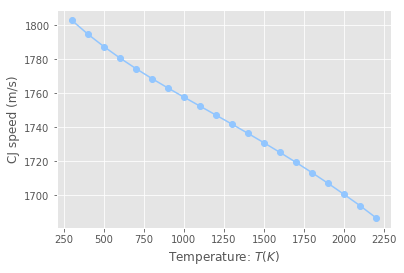

In [5]:
#Plotting results- CJ speed
plt.plot(CJspeeds['T1'], CJspeeds['CJspeed'], 'o-')
plt.ylabel('CJ speed (m/s)')
plt.xlabel(r'Temperature: $T(K)$')
plt.savefig('T_CJspeed.png')
plt.show()

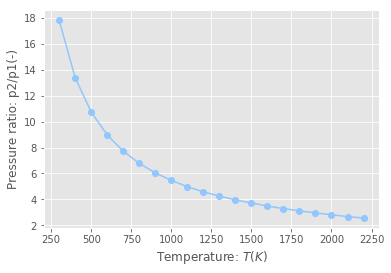

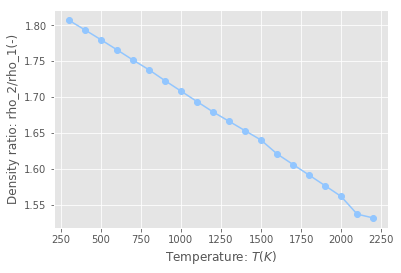

In [6]:
#Plotting other properties
plt.plot(CJspeeds['T1'], CJspeeds['pressure_ratio'], 'o-')
plt.ylabel('Pressure ratio: p2/p1(-)')
plt.xlabel(r'Temperature: $T(K)$')
plt.savefig('T_pressure.png')
plt.show()

plt.plot(CJspeeds['T1'], CJspeeds['density_ratio'], 'o-')
plt.ylabel('Density ratio: rho_2/rho_1(-)')
plt.xlabel(r'Temperature: $T(K)$')
plt.savefig('T_rho.png')
plt.show()

In [7]:
"""

Calculations for different initial conditions - pressure

"""
#Making a list of the pressures to run simulations at
P = []
counter = 0
while counter<30:
    P.append(10000+5000*counter**2.5)
    counter+=1


#Creating a dataFrame in wchich will be stored results
CJspeeds = pd.DataFrame(data={'P1': P})
CJspeeds['CJspeed'] = np.nan
CJspeeds['pressure_ratio'] = np.nan
CJspeeds['density_ratio'] = np.nan

for i, pressure in enumerate(P):
    #Setting the gas
    T1 = 295
    P1 = pressure
    mech = "gri30_highT.cti"
    q ='C2H6:0.286 O2:1 N2:3.76'
    gas_initial = ct.Solution(mech)
    gas_initial.TPX = T1, P1, q
    rho_1 = gas_initial.density
    
    # compute CJ speed
    cj_speed = CJspeed(P1, T1, q, mech)  
    
    # compute equilibrium CJ state parameters
    gas = PostShock_eq(cj_speed, P1, T1, q, mech)
    rho_2 = gas.density
    P2 = gas.P
    
    print('Computed CJ speed: {:.1f} m/s for P={:3.2f}bar.'.format(cj_speed, pressure/100000))
    
    CJspeeds.at[i, 'CJspeed'] = cj_speed
    CJspeeds.at[i, 'pressure_ratio'] = P2/P1
    CJspeeds.at[i, 'density_ratio'] = rho_2/rho_1
    

Computed CJ speed: 1760.6 m/s for P=0.10bar.
Computed CJ speed: 1768.6 m/s for P=0.15bar.
Computed CJ speed: 1786.2 m/s for P=0.38bar.
Computed CJ speed: 1800.9 m/s for P=0.88bar.
Computed CJ speed: 1811.9 m/s for P=1.70bar.
Computed CJ speed: 1820.3 m/s for P=2.90bar.
Computed CJ speed: 1827.0 m/s for P=4.51bar.
Computed CJ speed: 1832.4 m/s for P=6.58bar.
Computed CJ speed: 1837.0 m/s for P=9.15bar.
Computed CJ speed: 1840.9 m/s for P=12.25bar.
Computed CJ speed: 1844.2 m/s for P=15.91bar.
Computed CJ speed: 1847.2 m/s for P=20.17bar.
Computed CJ speed: 1849.8 m/s for P=25.04bar.
Computed CJ speed: 1852.2 m/s for P=30.57bar.
Computed CJ speed: 1854.3 m/s for P=36.77bar.
Computed CJ speed: 1856.2 m/s for P=43.67bar.
Computed CJ speed: 1857.9 m/s for P=51.30bar.
Computed CJ speed: 1859.5 m/s for P=59.68bar.
Computed CJ speed: 1861.0 m/s for P=68.83bar.
Computed CJ speed: 1862.4 m/s for P=78.78bar.
Computed CJ speed: 1863.6 m/s for P=89.54bar.
Computed CJ speed: 1864.8 m/s for P=101.15b

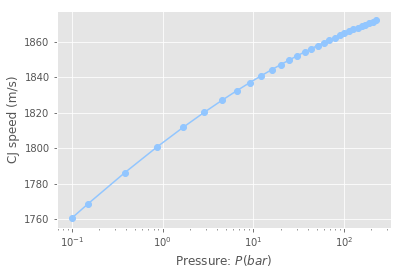

In [8]:
#Plotting CJ speed   
fig = plt.figure()
ax = fig.add_subplot(111)
ax.semilogx(CJspeeds['P1']/100000, CJspeeds['CJspeed'], 'o-')
ax.set_ylabel('CJ speed (m/s)')
ax.set_xlabel(r'Pressure: $P(bar)$');
plt.savefig('P_CJspeed.png')
plt.show()

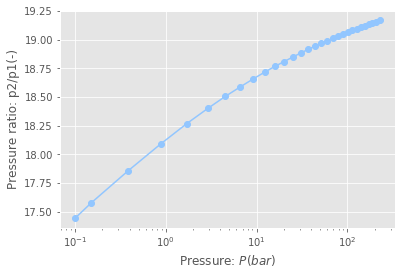

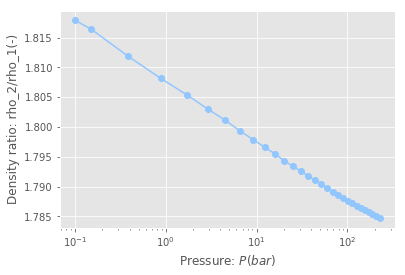

In [9]:
#Plotting other properties
fig = plt.figure()
ax = fig.add_subplot(111)
ax.semilogx(CJspeeds['P1']/100000, CJspeeds['pressure_ratio'], 'o-')
plt.ylabel('Pressure ratio: p2/p1(-)')
plt.xlabel(r'Pressure: $P(bar)$')
plt.savefig('P_pressure.png')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.semilogx(CJspeeds['P1']/100000, CJspeeds['density_ratio'], 'o-')
plt.ylabel('Density ratio: rho_2/rho_1(-)')
plt.xlabel(r'Pressure: $P(bar)$')
plt.savefig('P_rho.png')
plt.show()

In [10]:
"""

Calculations for different initial conditions - stoichiometric coefficient

"""
#Making a list of the phis to run simulations at
phis = []
counter = 0
while counter<20:
    phis.append(0.515+counter*0.1)
    counter+=1

#Creating a dataFrame in wchich will be stored results
CJspeeds = pd.DataFrame(data={'phi': phis})
CJspeeds['CJspeed'] = np.nan
CJspeeds['pressure_ratio'] = np.nan
CJspeeds['density_ratio'] = np.nan

for i, stcoef in enumerate(phis):
    #Setting the gas
    T1 = 295
    P1 = 101325.0
    mech = "gri30_highT.cti"
    q ='C2H6:'+str(0.286*stcoef)+' O2:1 N2:3.76'
    gas_initial = ct.Solution(mech)
    gas_initial.TPX = T1, P1, q
    rho_1 = gas_initial.density
    
    # compute CJ speed
    cj_speed = CJspeed(P1, T1, q, mech)  
    
    # compute equilibrium CJ state parameters
    gas = PostShock_eq(cj_speed, P1, T1, q, mech)
    rho_2 = gas.density
    P2 = gas.P
       
    print('Computed CJ speed: {:.1f} m/s for phi={:.3f}.'.format(cj_speed, stcoef))
    
    CJspeeds.at[i, 'CJspeed'] = cj_speed
    CJspeeds.at[i, 'pressure_ratio'] = P2/P1
    CJspeeds.at[i, 'density_ratio'] = rho_2/rho_1
    

Computed CJ speed: 1512.1 m/s for phi=0.515.
Computed CJ speed: 1600.3 m/s for phi=0.615.
Computed CJ speed: 1673.0 m/s for phi=0.715.
Computed CJ speed: 1730.8 m/s for phi=0.815.
Computed CJ speed: 1775.2 m/s for phi=0.915.
Computed CJ speed: 1807.5 m/s for phi=1.015.
Computed CJ speed: 1828.5 m/s for phi=1.115.
Computed CJ speed: 1838.6 m/s for phi=1.215.
Computed CJ speed: 1839.3 m/s for phi=1.315.
Computed CJ speed: 1833.6 m/s for phi=1.415.
Computed CJ speed: 1824.1 m/s for phi=1.515.
Computed CJ speed: 1812.1 m/s for phi=1.615.
Computed CJ speed: 1798.6 m/s for phi=1.715.
Computed CJ speed: 1783.9 m/s for phi=1.815.
Computed CJ speed: 1768.1 m/s for phi=1.915.
Computed CJ speed: 1751.4 m/s for phi=2.015.
Computed CJ speed: 1733.8 m/s for phi=2.115.
Computed CJ speed: 1715.3 m/s for phi=2.215.
Computed CJ speed: 1696.0 m/s for phi=2.315.
Computed CJ speed: 1675.9 m/s for phi=2.415.


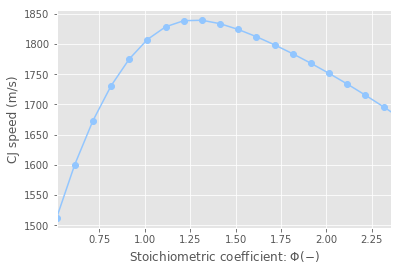

In [11]:
#Plotting results - CJ speed
plt.plot(CJspeeds['phi'], CJspeeds['CJspeed'], 'o-')
plt.ylabel('CJ speed (m/s)')
plt.xlabel(r'Stoichiometric coefficient: $\Phi(-)$')
plt.xlim([0.515, 2.358])
plt.savefig('phi_CJspeed.png')
plt.show()

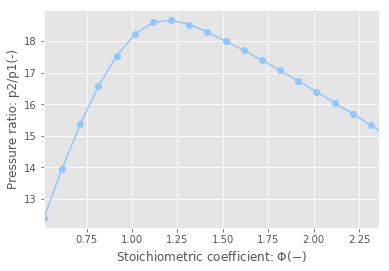

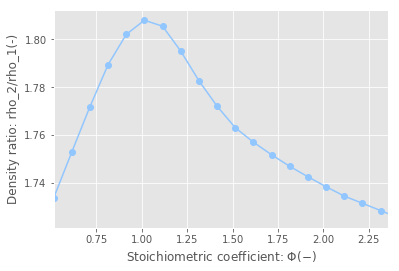

In [12]:
#Plotting other properties
plt.plot(CJspeeds['phi'], CJspeeds['pressure_ratio'], 'o-')
plt.ylabel('Pressure ratio: p2/p1(-)')
plt.xlabel(r'Stoichiometric coefficient: $\Phi(-)$')
plt.xlim([0.515, 2.358])
plt.savefig('phi_pressure.png')
plt.show()


plt.plot(CJspeeds['phi'], CJspeeds['density_ratio'], 'o-')
plt.ylabel('Density ratio: rho_2/rho_1(-)')
plt.xlabel(r'Stoichiometric coefficient: $\Phi(-)$')
plt.xlim([0.515, 2.358])
plt.savefig('phi_rho.png')
plt.show()